# Fechting the dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SCFInitialGuess.utilities.plotutils import matrix_error

In [2]:
S, P = np.load("butadien/dataset.npy")
dim = 26
p = list(P.reshape(-1, dim, dim))
s = list(S.reshape(-1, dim, dim))

# Check for symmetry

In [3]:
def symmetry_error(M):
    
    error = np.zeros(M[0].shape)
    for m in M:
        error += np.abs(m - np.transpose(m))
        
    return error / len(M)

## S -Matrix

0.0


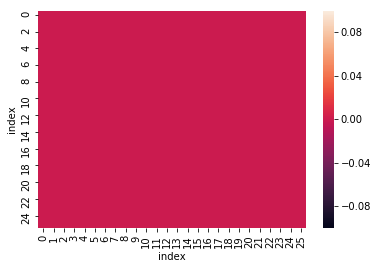

In [4]:
error = symmetry_error(s)
print(np.mean(error))
matrix_error(error)
plt.show()

## P-Matrix

1.47132254253e-18


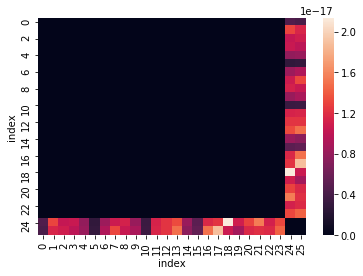

In [5]:
error = symmetry_error(p)
print(np.mean(error))
matrix_error(error)
plt.show()

# Idempotency

$$PSP^T-2P=0$$,
Faktor 2 wegen Definition/Besetzung

In [6]:
def idempotency_error(M):
    
    error = np.zeros(M[0].shape)
    for m in M:
        error += np.abs(m - np.dot(m, m))
        
    return error / len(M)

def weighted_idempotency_eror(M, W):
    
    error = np.zeros(M[0].shape)
    for m, w in zip(M, W):
        error += np.abs(2 * m - np.dot(m, np.dot(w, m)))
        
    return error / len(M)
    

3.11776929727e-16
4.28554966415e-16
2.75821513835e-16
3.43905240259e-16
2.68715178057e-16
3.34589321303e-16
3.07647338376e-16
3.22237235303e-16
3.3630944975e-16
3.7454844642e-16
2.93682060585e-16
2.6760270804e-16
2.65835306133e-16
2.64910526587e-16
2.77389316688e-16
2.56481656621e-16
2.82948559318e-16
3.68167311182e-16
2.99660369006e-16
3.3808150282e-16
2.61498337058e-16
2.85171875456e-16
3.73439645208e-16
2.92716222496e-16
2.84428250696e-16
3.29875567916e-16
2.70647255198e-16
3.12801909762e-16
2.31046209501e-16
2.52219426927e-16
2.76262732796e-16
2.52506195194e-16
2.80898819778e-16
3.23909909856e-16
2.83598098264e-16
2.84484465617e-16
2.68788955128e-16
3.15199063123e-16
3.31268992246e-16
2.47097614164e-16
2.5534420665e-16
2.8730019359e-16
2.77374160312e-16
2.95987513858e-16
3.02922879294e-16
3.54238200194e-16
2.78843967968e-16
2.96505156242e-16
2.38724518059e-16
2.46446531513e-16
2.54514535372e-16
2.95317746363e-16
2.81044369108e-16
3.39791527016e-16
3.0318996031e-16
2.94565861779e-16

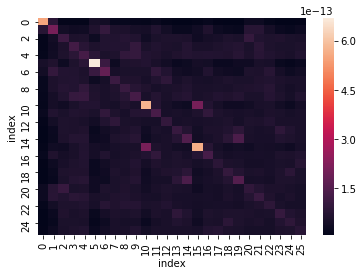

In [10]:
def mc_wheeny_purification(p,s):
    p = p.reshape(dim, dim)
    s = s.reshape(dim, dim)
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def mc_wheeny_purification_2(p, s=None):
    p = p.reshape(dim, dim)
    return 3 * np.dot(p, p) - 2 * np.dot(np.dot(p, p), p)

def idemp_error(p, s):
    p = p.reshape(dim, dim)
    s = s.reshape(dim, dim)
    return np.mean((np.abs(p @ s @ p.T - 2 * p)))


for (s, p) in zip(S, P):
    
    print(idemp_error(p,s))
    
    
matrix_error(error)
plt.show()

                   

### Normal

0.0942548214771


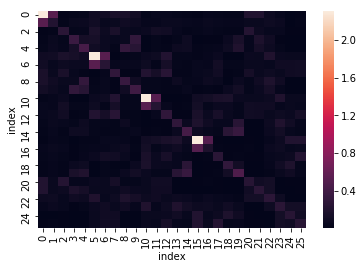

In [7]:
error = idempotency_error(p)
print(np.mean(error))
matrix_error(error)
plt.show()

### Strange basis

2.96277439076e-16


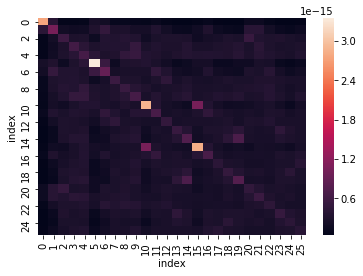

In [8]:
error = weighted_idempotency_eror(p, s)
print(np.mean(error))
matrix_error(error)
plt.show()